In [1]:
import pandas as pd
from matplotlib import pylab as plt
import os


In [2]:
df=pd.read_csv("/home/cool/PycharmProjects/pythonProject2/Sales_Data/Sales_April_2019.csv")
df.head()
files=(file for file in os.listdir('/home/cool/PycharmProjects/pythonProject2/Sales_Data/'))
all_months_data=pd.DataFrame()
for file in files:
    ddf=pd.read_csv("/home/cool/PycharmProjects/pythonProject2/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,ddf])
    
    

In [3]:

all_months_data.shape

(186850, 6)

In [4]:
all_months_data.to_csv("all_data.csv",index=False)

In [5]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


### lets augument the data with additional column

### Add month column

In [6]:
all_data['Month']=all_data['Order Date'].str[0:2]


### Data contains some NAN values which needs to be cleaned 

## Drop rows  of NAN

In [7]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how='all')
all_data.head()
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


## convert month column ito integer 

In [8]:
##all_data['Month']=all_data['Month'].astype('int32')
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()
## we have or in moth so we will ned to update all_data dataframe so that it dosnt contain these values so we basically need to deop thoes rows
all_data=all_data[all_data['Order Date'].str[0:2]!= 'Or']

In [9]:
all_data['Month']=all_data['Month'].astype('int32')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


#### Question 1: Which is best month for sales ? How much was earned in that month ?

# add new column to represent sales sales=price*quantity
#for this we will need to convert obj data type of a quantity and price to numeric type
#which can be done in diff  way like using  astype() or to_numeric() , to_numeric() automatically 
# converts to suitabe numeric data type

In [10]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])


In [11]:
all_data['Sales']=all_data['Quantity Ordered']* all_data['Price Each']
all_data.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,11.95


In [12]:
results=all_data.groupby('Month').sum()

<BarContainer object of 12 artists>

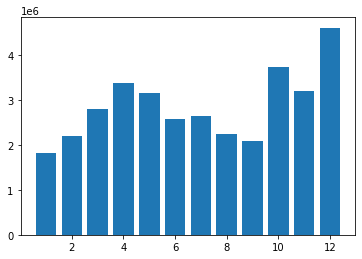

In [13]:
months=range(1,13)
plt.bar(months,results['Sales'])

### Now we need to find highest sale according to city .For this we need to create new column city to store cityname

## we can take help of panda function .apply to apply user made function to get required city value 

In [14]:
def get_city(address):
    return address.split(',')[1]   # get next value after comma until next comma occurs

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+ ' ( '+get_state(x)+')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin ( TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin ( TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin ( TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco ( CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco ( CA)


In [15]:
results=all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta ( GA),16602,2.779908e+06,104794,2.795499e+06
Austin ( TX),11153,1.809874e+06,69829,1.819582e+06
Boston ( MA),22528,3.637410e+06,141112,3.661642e+06
Dallas ( TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles ( CA),33289,5.421435e+06,208325,5.452571e+06
New York City ( NY),27932,4.635371e+06,175741,4.664317e+06
Portland ( ME),2750,4.471893e+05,17144,4.497583e+05
Portland ( OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco ( CA),50239,8.211462e+06,315520,8.262204e+06


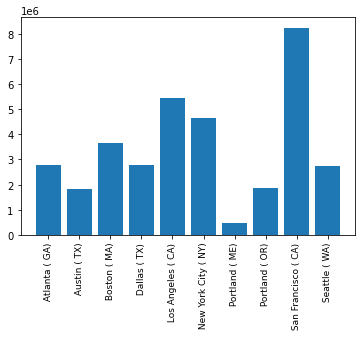

In [16]:
#unique function gives all unique value in colums to plot

cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=9)
plt.show()


# At what hour there was maximum sales so that it is most effective to display advertisement ?

### lets add new column hour so tah we can group by hour and analyse no of sale in that hour by help of line plo

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin ( TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin ( TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin ( TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco ( CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco ( CA)


In [18]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin ( TX)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin ( TX)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin ( TX)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco ( CA)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco ( CA)


In [22]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin ( TX),20
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin ( TX),20
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin ( TX),20
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco ( CA),5
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco ( CA),0


### lets plot line chart ot analyze no of sales

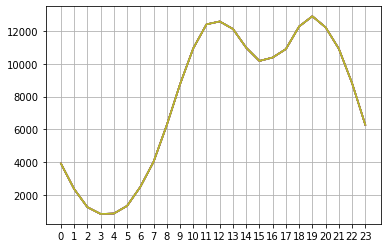

In [31]:
hour=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hour,all_data.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.show()

## we can see that peak is at around 11 am and 7 pm so we can advertise around that time

In [38]:

all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin ( TX),20
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin ( TX),20
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin ( TX),20
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco ( CA),5
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco ( CA),0
5,162012,AA Batteries (4-pack),1,3.84,2019-03-20 21:33:00,"187 Ridge St, San Francisco, CA 94016",3,3.84,San Francisco ( CA),21
6,162013,34in Ultrawide Monitor,1,379.99,2019-03-15 23:05:00,"904 Main St, Austin, TX 73301",3,379.99,Austin ( TX),23
7,162014,USB-C Charging Cable,1,11.95,2019-03-01 21:33:00,"10 13th St, San Francisco, CA 94016",3,11.95,San Francisco ( CA),21
8,162015,AA Batteries (4-pack),1,3.84,2019-03-02 08:52:00,"949 Jefferson St, Boston, MA 02215",3,3.84,Boston ( MA),8
9,162016,AAA Batteries (4-pack),5,2.99,2019-03-19 21:10:00,"469 Highland St, Atlanta, GA 30301",3,14.95,Atlanta ( GA),21
